In [1]:
import numpy as np
from netCDF4 import Dataset
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.ion()

In [2]:

mpl.rcParams['image.cmap'] = 'RdBu_r'
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'


In [3]:
exp = 'turb2d_forced_ss'
#exp = 'fd_00'
ncfile = os.getenv("HOME")+'/data/fluid2d/{0}/{0}_his.nc'.format(exp)
print(ncfile)

/Users/gula/data/fluid2d/turb2d_forced_ss/turb2d_forced_ss_his.nc


In [4]:
with Dataset(ncfile) as nc:
    psi = nc['psi'][:, :, :]
    vor = nc['vorticity'][:, :, :]
    trac = nc['tracer'][:, :, :]
    time = nc['t'][:]
    x = nc['x'][:]
    y = nc['y'][:]
dx = x[1]-x[0]
dy = y[1]-y[0]

In [5]:
z3d = trac

In [6]:
mini = z3d.min()
maxi = z3d.max()
bins = np.linspace(mini, maxi, 100)

<ipython-input-7-c6b3fb1f54f3>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  h, x = np.histogram(z3d[k].ravel(), bins, normed=True)


Text(0.5, 1.0, 'turb2d_forced_ss')

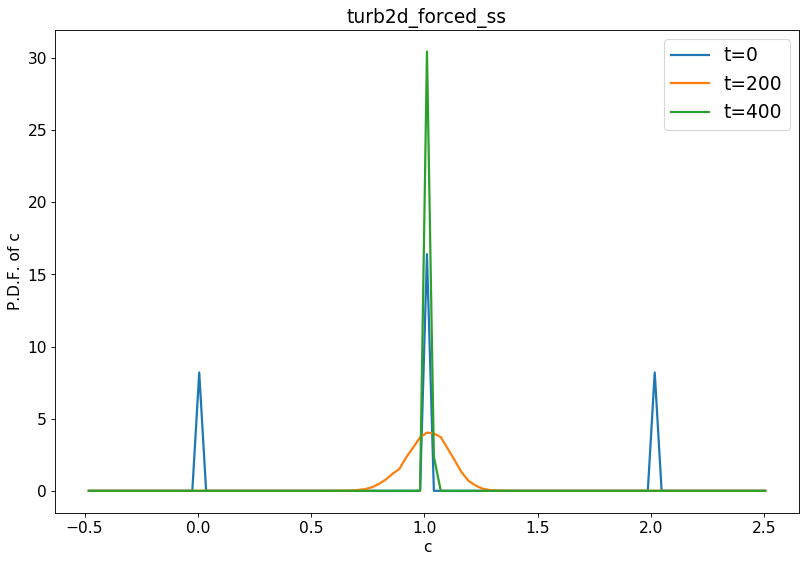

In [7]:
nt = len(time)
for k in range(0, nt, 10):
    t = time[k]
    h, x = np.histogram(z3d[k].ravel(), bins, normed=True)
    plt.plot(x[1:],h, label='t=%.0f' % t)
plt.xlabel('c')
plt.ylabel('P.D.F. of c')
plt.legend()
plt.title(exp)

In [8]:
def grad(f, dx, axis=0, flip=False):
    if flip:
        # return i minus i-1 at i
        gx = (f-np.roll(f, 1, axis=axis))/dx
    else:
        # return i+1 minus i at i
        gx = (np.roll(f, -1, axis=axis)-f)/dx
    return gx


Text(0, 0.5, '$\\kappa_e$')

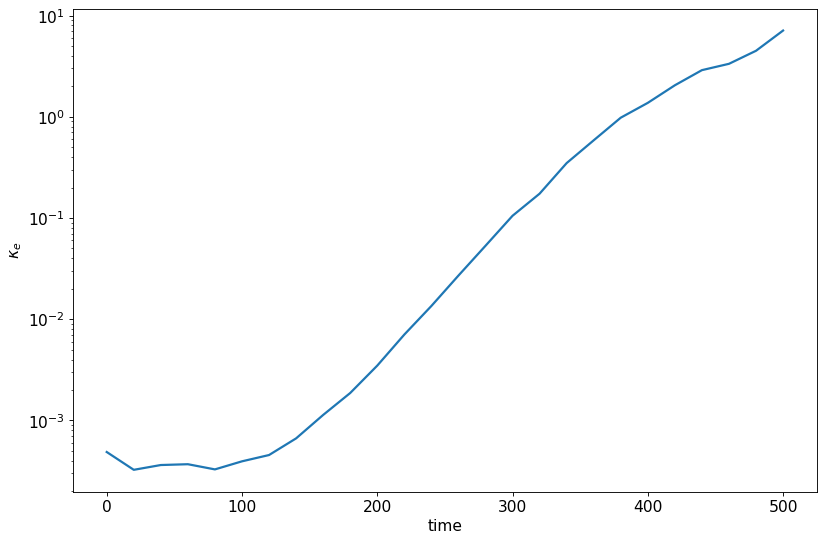

In [9]:
nt = len(time)
grad2 = np.zeros((nt,))
C2 = np.zeros((nt,))

for k in range(nt):
    phi = z3d[k]
    grad2[k] = (grad(phi, dx, axis=1)**2).mean() + (grad(phi, dy, axis=0)**2).mean()
    C2[k] = 0.5 * (phi**2).mean()
plt.semilogy(time, C2/grad2)
plt.xlabel('time')
plt.ylabel(r'$\kappa_e$')


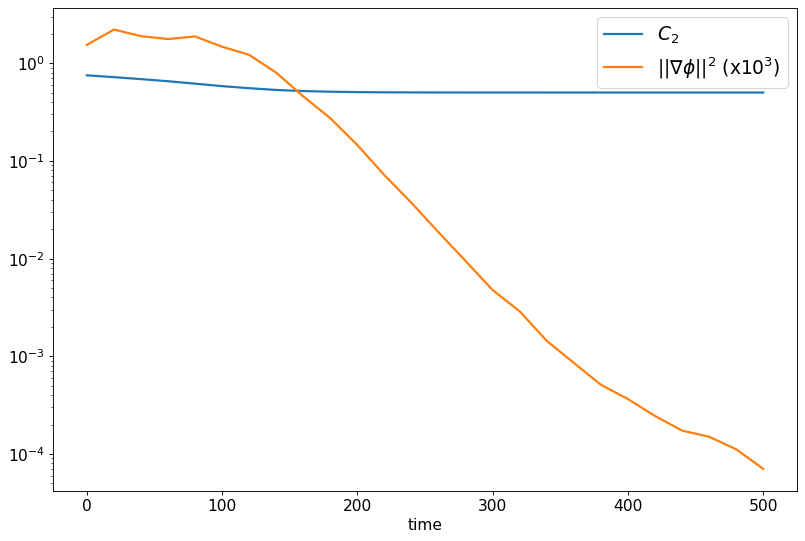

In [10]:
plt.semilogy(time, C2, label=r'$C_2$')
plt.semilogy(time,grad2*1e-3, label=r'$||\nabla\phi||^2$ (x$10^3$)')
plt.xlabel('time')
plt.legend()

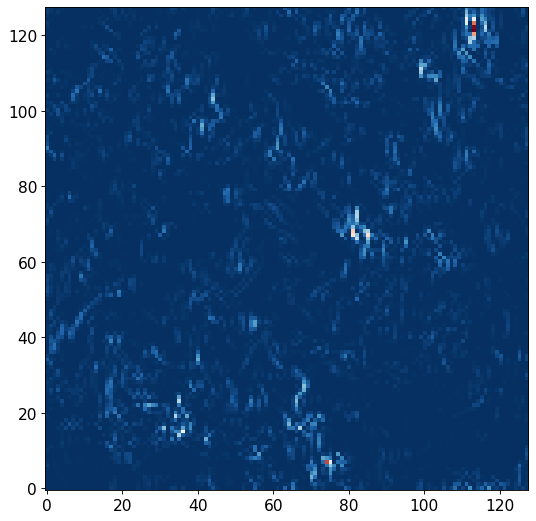

In [11]:
# check the x-component of grad phi squared
plt.imshow(grad(phi, dx, axis=1)**2)